# Syriatel Customer Churn Project

## Introduction




This project analyzes the  [SyriaTel Churn dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) to predict whether a customer is likely to stop doing business with SyriaTel, a telecommunications company. The goal of this analysis is to help the business identify customers at high risk of churning and support data-driven decisions aimed at improving customer retention.


## Objectives 


The main objectives of this project are to:

1. Clean and prepare the customer data for classification modeling  
2. Build and evaluate classification models to predict customer churn  
3. Identify key factors associated with customer churn  
4. Provide actionable recommendations to reduce customer churn


## Business Understanding



Customer churn represents a significant financial challenge for telecommunications companies as losing customers directly impacts recurring revenue. SyriaTel’s management require data-driven insights to better understand which customers are most likely to leave the service.

This analysis focuses on identifying patterns in customer behavior, such as service usage, subscription plans, and customer service interactions, that are associated with higher churn risk. By predicting churn in advance, the business can target at-risk customers with retention strategies, such as improved support or personalized offers, to reduce overall customer loss.


## Data Understanding

In [1]:
# importing the necessary libraries for data understanding and loading the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./Data/Customer_Churn.csv")
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
# overview of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [3]:
#Checking for null values
df.isna().sum() # No null values from the output


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [4]:
#Check for duplicates
df.duplicated().sum() #No duplicatesfrom the output

0

In [5]:
#Convert the columnsto snake case for readability
df.columns = df.columns.str.replace(' ', '_')
df.columns


Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

### Exploring some  possible feature columns

In [6]:
df['international_plan'].value_counts()

no     3010
yes     323
Name: international_plan, dtype: int64

In [7]:
df['customer_service_calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer_service_calls, dtype: int64

In [8]:
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
OH     78
WI     78
VA     77
WY     77
CT     74
ID     73
VT     73
MI     73
UT     72
TX     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
WA     66
NV     66
CO     66
MS     65
MA     65
RI     65
AZ     64
FL     63
MO     63
ME     62
NM     62
ND     62
NE     61
DE     61
OK     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

### Exploring the Target Variable(Churn) Column

In [9]:
#Checking the churn column to see its content
df['churn'].value_counts(normalize=True) *100

False    85.508551
True     14.491449
Name: churn, dtype: float64

### NOTE:


The `churn` column has 85:15 split meaning it is imbalanced thus need to apply methods to handle this(SMOTE and class weights)

In [10]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

### Handling the minutes and calls columns subdivisions to one columns

In [11]:
# I want a column that cover the totalminuted for a day
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] +df['total_intl_minutes']+ df['total_night_minutes']

In [12]:
df['total_calls'] = df['total_day_calls']+ df['total_eve_calls']+ df['total_night_calls']+ df['total_intl_calls']

In [13]:
df['total_charges'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge']

In [14]:
# Phone numbers are respective to indivual and has little to no relation on churn rate
#also dropping the state column
cols_to_drop =['state','phone_number']
df = df.drop(cols_to_drop, axis=1)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   object 
 3   voice_mail_plan         3333 non-null   object 
 4   number_vmail_messages   3333 non-null   int64  
 5   total_day_minutes       3333 non-null   float64
 6   total_day_calls         3333 non-null   int64  
 7   total_day_charge        3333 non-null   float64
 8   total_eve_minutes       3333 non-null   float64
 9   total_eve_calls         3333 non-null   int64  
 10  total_eve_charge        3333 non-null   float64
 11  total_night_minutes     3333 non-null   float64
 12  total_night_calls       3333 non-null   int64  
 13  total_night_charge      3333 non-null   float64
 14  total_intl_minutes      3333 non-null   

### Handling the categorical columns to numerical columns

In [16]:
## Handling the churn column
df['churn'] = df['churn'].apply(lambda x: 1 if x== True else 0)


In [17]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [18]:
## Handling the categorical feature columns
categorical_cols = [ 'international_plan', 'voice_mail_plan']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   number_vmail_messages   3333 non-null   int64  
 3   total_day_minutes       3333 non-null   float64
 4   total_day_calls         3333 non-null   int64  
 5   total_day_charge        3333 non-null   float64
 6   total_eve_minutes       3333 non-null   float64
 7   total_eve_calls         3333 non-null   int64  
 8   total_eve_charge        3333 non-null   float64
 9   total_night_minutes     3333 non-null   float64
 10  total_night_calls       3333 non-null   int64  
 11  total_night_charge      3333 non-null   float64
 12  total_intl_minutes      3333 non-null   float64
 13  total_intl_calls        3333 non-null   int64  
 14  total_intl_charge       3333 non-null   

In [20]:
df.columns

Index(['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn', 'total_minutes', 'total_calls',
       'total_charges', 'international_plan_yes', 'voice_mail_plan_yes'],
      dtype='object')

In [21]:
df.head()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,total_minutes,total_calls,total_charges,international_plan_yes,voice_mail_plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,10.0,3,2.70,1,0,717.2,303,75.56,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,13.7,3,3.70,1,0,625.2,332,59.24,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,12.2,5,3.29,0,0,539.4,333,62.29,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,6.6,7,1.78,2,0,564.8,255,66.80,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,10.1,3,2.73,3,0,512.0,359,52.09,1,0


<AxesSubplot:>

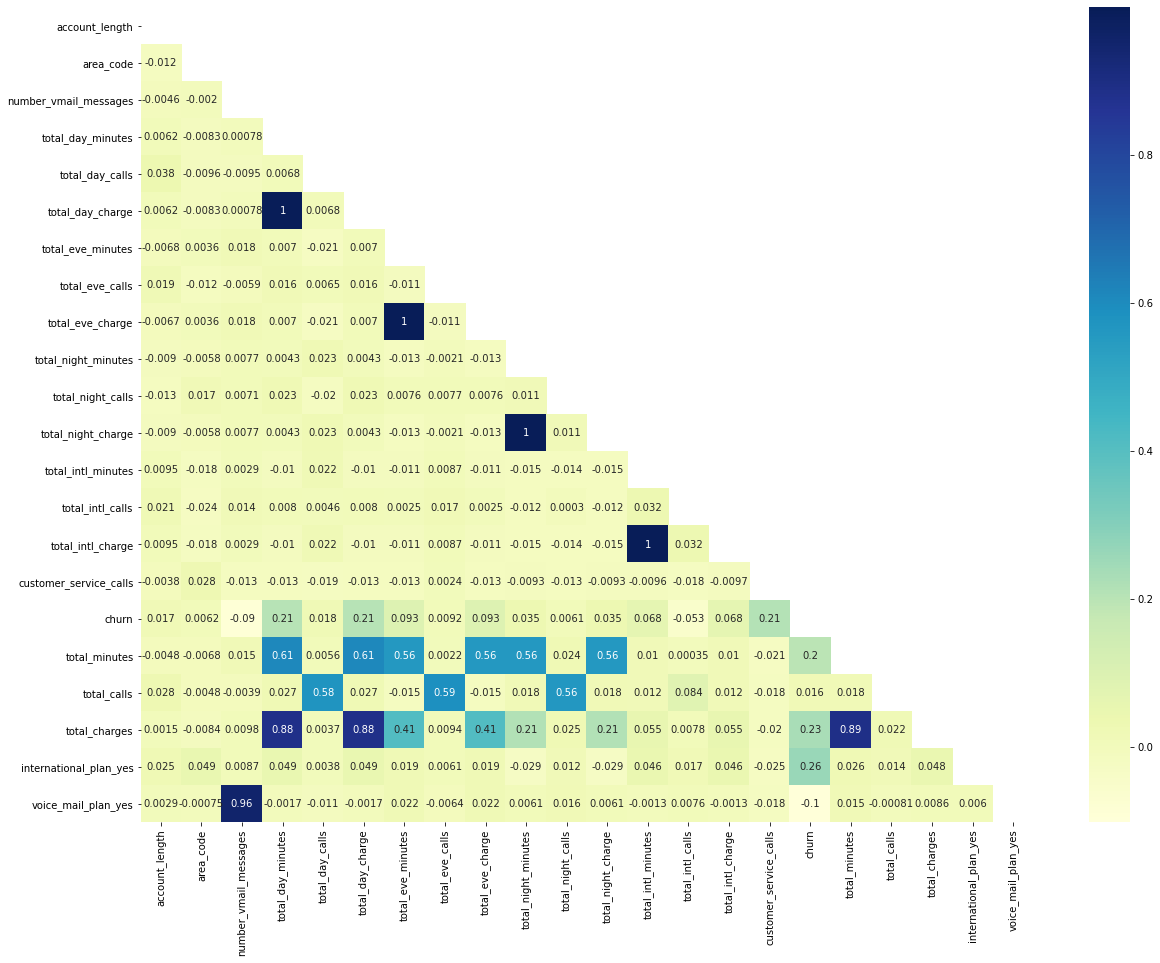

In [22]:
corr = df.corr()
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(corr,cmap="YlGnBu", annot=True,mask = mask, annot_kws={'size':10} )